In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

In [3]:
df = pd.read_csv('BEST.csv', index_col = 'Date', header=0, parse_dates=[0], date_parser=parser)
df.drop(['Adj Close', 'Volume'], axis=1, inplace=True)
df.sort_index(inplace=True) ## Sort in chronological order or as earlier dates first
df

,Open,High,Low,Close
Date,,,,
2017-09-20,11.48,11.89,10.310,10.52
2017-09-21,10.73,11.00,10.340,10.89
2017-09-22,11.06,12.90,10.950,12.05
2017-09-25,12.50,13.25,12.400,12.64
2017-09-26,12.86,12.90,11.560,11.75
...,...,...,...,...
2021-02-01,2.25,2.33,2.180,2.27
2021-02-02,2.30,2.41,2.260,2.36
2021-02-03,2.37,2.52,2.344,2.46


In [6]:
# df=df.loc['2016-10-01':'2018-9-30'] ##Select some data using pandas’ .loc indexing

In [7]:
CL_period = 20 # length of Tenkan Sen or Conversion Line
BL_period = 60 # length of Kijun Sen or Base Line
Lead_span_B_period = 120 # length of Senkou Sen B or Leading Span B
Lag_span_period = 30 # length of Chikou Span or Lagging Span
Chikou_span_period = 30 # length of Chikou Span

In [8]:
# add to the dataframe, different components of the Ichimoku
# use shift function to shift a time series forward by the given value
df['Conv_line'] = (df.High.shift(CL_period)+df.Low.shift(CL_period))/2
df['Base_line'] = (df.High.shift(BL_period)+df.Low.shift(BL_period))/2
df['Lead_span_A'] = (df['Conv_line'] + df['Base_line'])/2
df['Lead_span_B'] = (df.High.shift(Lead_span_B_period)+df.Low.shift(Lead_span_B_period))/2
df['Lagging_span'] = df.Close.shift(Lag_span_period)
df['Chikou_span'] = df.Close.shift(-Chikou_span_period)

ValueError: operands could not be broadcast together with shapes (200,) (851,) 

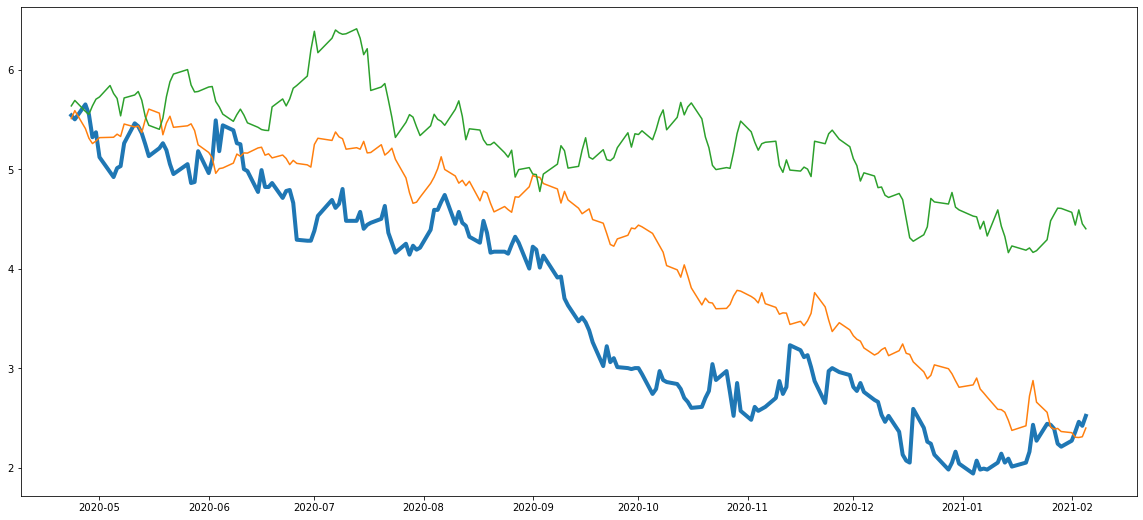

In [9]:
fig,ax = plt.subplots(1,1,sharex=True,figsize = (20,9)) 
last_days=200
dfplot = df.iloc[-last_days:, :]
x_ = range(0, dfplot.shape[0])
ax.plot(dfplot.index, dfplot.Close,linewidth=4)
ax.plot(dfplot.index, dfplot.Lead_span_A)
ax.plot(dfplot.index, dfplot.Lead_span_B)

ax.fill_between(dfplot.index,df.Lead_span_A,dfplot.Lead_span_B,where = dfplot.Lead_span_A >= dfplot.Lead_span_B, color = 'lightgreen')


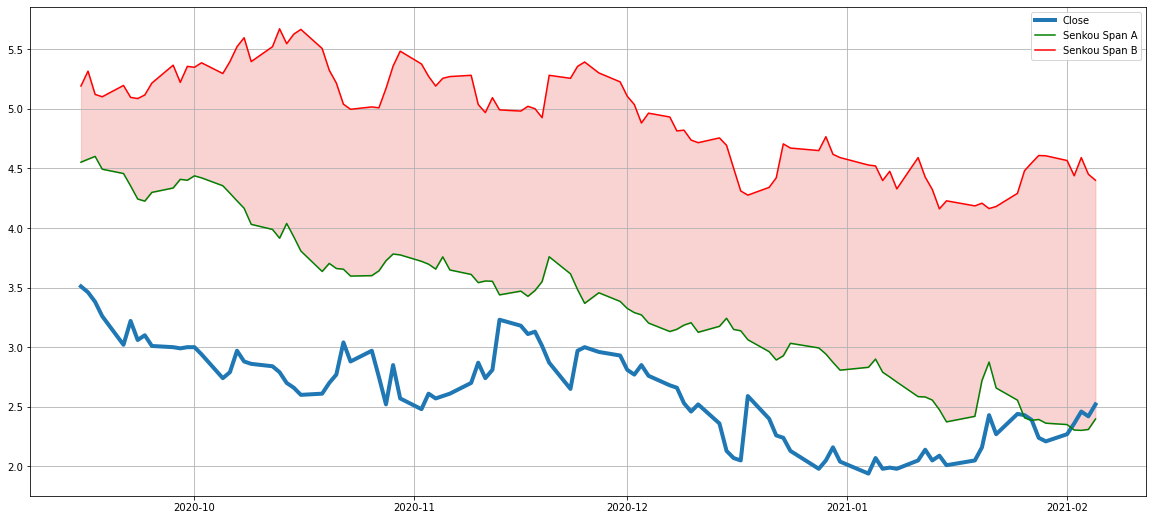

In [10]:
# plot the data using matplotlib's functionality
#add figure and axis objects
fig,ax = plt.subplots(1,1,sharex=True,figsize = (20,9)) #share x axis and set a figure size

last_days=100
dfplot = df.iloc[-last_days:, :]
x_ = range(0, dfplot.shape[0])

ax.plot(dfplot.index, dfplot.Close,linewidth=4, label='Close') # plot Close with index on x-axis with a line thickness of 4
ax.plot(dfplot.index, dfplot.Lead_span_A, label='Senkou Span A', color='g') # plot Lead Span A with index on the shared x-axis
ax.plot(dfplot.index, dfplot.Lead_span_B, label='Senkou Span B', color='r') # plot Lead Span B with index on the sahred x-axis
#ax.plot(dfplot.index, dfplot.Conv_line, label='Tenkan-Sen', color='m') 
#ax.plot(dfplot.index, dfplot.Base_line, label='Kijun', color='c')
#ax.plot(dfplot.index, dfplot.Lagging_span, label='Chiou Span', color='b')
#ax.plot(dfplot.index, dfplot.Chikou_span, label='Chikou Span', color='chocolate')

# use the fill_between call of ax object to specify where to fill the chosen color
# pay attention to the conditions specified in the fill_between call
ax.fill_between(dfplot.index,dfplot.Lead_span_A,dfplot.Lead_span_B,where = dfplot.Lead_span_A >= dfplot.Lead_span_B, color = 'lightgreen', alpha=.35)
ax.fill_between(dfplot.index,dfplot.Lead_span_A,dfplot.Lead_span_B,where = dfplot.Lead_span_A < dfplot.Lead_span_B, color = 'lightcoral', alpha=.35)

plt.legend(loc=0) #Let matplotlib choose best location for legend
plt.grid() # display the major grid
plt.show() # Finally display the plot